In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
dataset=pd.read_csv('house_rent_cleaned_encoded_5000.csv')

In [3]:
dataset

,BHK,Size,Bathroom,Rent,Current Floor,Total Floors,Area Type_Super Area,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,3,2370,2,15086,3.0,8.0,1,1,0,0,0,1,0,1,0
1,4,2110,3,45544,0.0,17.0,0,0,0,1,0,0,0,0,1
2,1,2446,2,23955,8.0,9.0,1,0,0,0,0,0,1,0,1
3,3,1302,1,52660,3.0,13.0,0,0,0,1,0,1,0,0,1
4,3,764,1,78736,1.0,13.0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1366,2,38727,2.0,5.0,0,1,0,0,0,0,1,1,0
4996,2,1289,1,44398,7.0,8.0,1,0,0,1,0,0,1,0,1
4997,3,2560,1,43560,7.0,17.0,0,0,1,0,0,1,0,1,0
4998,2,2765,2,40331,9.0,16.0,1,0,0,0,1,1,0,1,0


In [4]:
dataset.columns

Index(['BHK', 'Size', 'Bathroom', 'Rent', 'Current Floor', 'Total Floors',
       'Area Type_Super Area', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family'],
      dtype='object')

In [5]:
independent=dataset[['BHK', 'Size', 'Bathroom', 'Current Floor', 'Total Floors',
       'Area Type_Super Area', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family']]

In [6]:
independent

,BHK,Size,Bathroom,Current Floor,Total Floors,Area Type_Super Area,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,3,2370,2,3.0,8.0,1,1,0,0,0,1,0,1,0
1,4,2110,3,0.0,17.0,0,0,0,1,0,0,0,0,1
2,1,2446,2,8.0,9.0,1,0,0,0,0,0,1,0,1
3,3,1302,1,3.0,13.0,0,0,0,1,0,1,0,0,1
4,3,764,1,1.0,13.0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1366,2,2.0,5.0,0,1,0,0,0,0,1,1,0
4996,2,1289,1,7.0,8.0,1,0,0,1,0,0,1,0,1
4997,3,2560,1,7.0,17.0,0,0,1,0,0,1,0,1,0
4998,2,2765,2,9.0,16.0,1,0,0,0,1,1,0,1,0


In [7]:
dependent=dataset[['Rent']]

In [8]:
dependent

,Rent
0,15086
1,45544
2,23955
3,52660
4,78736
...,...
4995,38727
4996,44398
4997,43560
4998,40331


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.20,random_state=0)

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':["squared_error","absolute_error","friedman_mse","poisson"],
'max_features':["sqrt","log2",None],
'n_estimators':[10,100]}
grid = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,cv=5,verbose=3,n_jobs=-1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 100]},
             verbose=3)

In [12]:
re=grid.cv_results_
grid_predictions = grid.predict(x_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,grid_predictions)
print("The R_score value for best parameter {}:".format(grid.best_params_),r_score)

The R_score value for best parameter {'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_estimators': 100}: -0.05905742892521859


# correlation

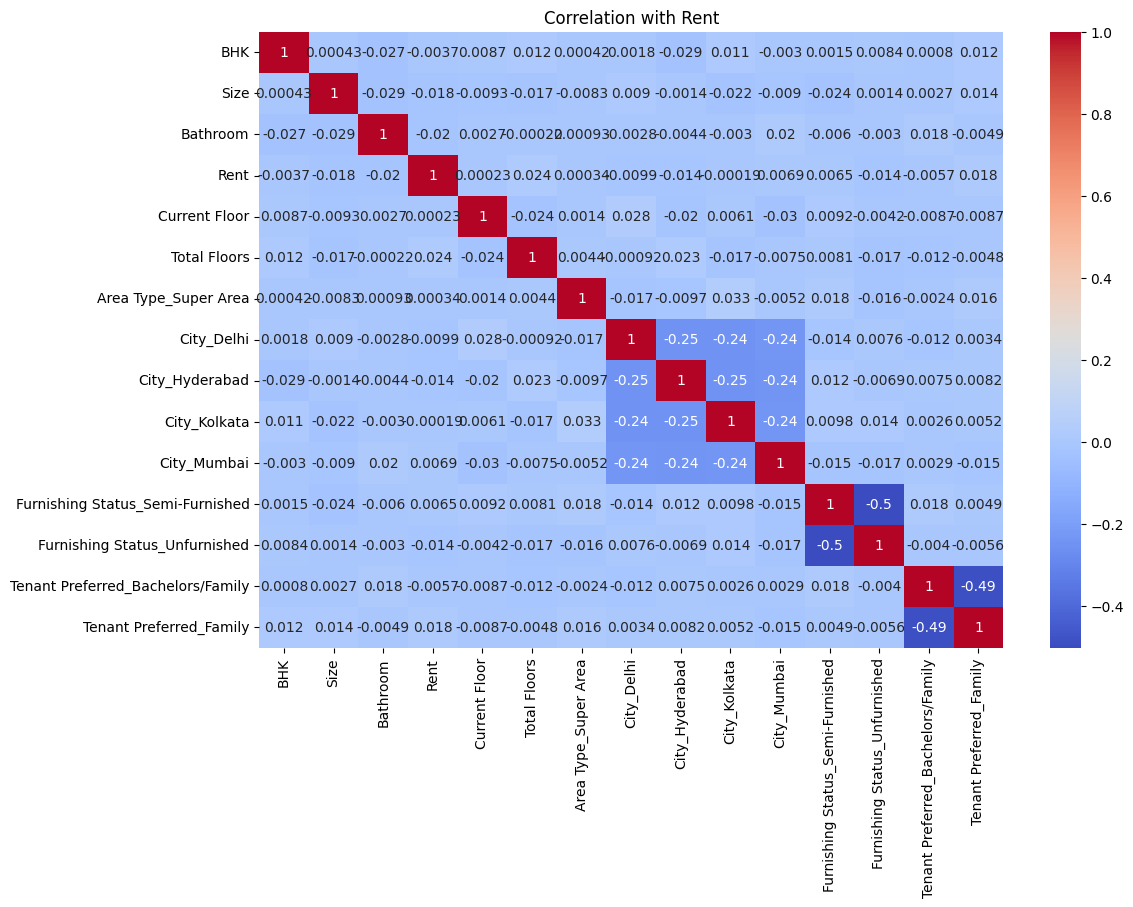

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

#Include only numeric columns for correlation
correlation = dataset.corr(numeric_only=True)

#Display correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation with Rent")
plt.show()

In [14]:
#To specifically see how each feature correlates with Rent:

print(correlation['Rent'].sort_values(ascending=False))



Rent                                 1.000000
Total Floors                         0.023997
Tenant Preferred_Family              0.018294
City_Mumbai                          0.006940
Furnishing Status_Semi-Furnished     0.006481
Area Type_Super Area                 0.000339
Current Floor                        0.000234
City_Kolkata                        -0.000188
BHK                                 -0.003677
Tenant Preferred_Bachelors/Family   -0.005691
City_Delhi                          -0.009946
Furnishing Status_Unfurnished       -0.014151
City_Hyderabad                      -0.014235
Size                                -0.017737
Bathroom                            -0.019698
Name: Rent, dtype: float64
